In [1]:
freq = 15

In [2]:
import codigo
from codigo import utils
from codigo import model_LSTM
from codigo import model_utils
from cg_ega.cg_ega import CG_EGA

In [3]:
import pandas as pd
import numpy as np
pd.set_option('mode.chained_assignment',None)
import matplotlib.pyplot as plt
import seaborn as sns
import math

%matplotlib inline

In [4]:
import tensorflow as tf
from tensorflow import keras

In [5]:
with open('dataset/generado/dataset15min/array_Xtest.npy', 'rb') as f:
    array_Xtest = np.load(f)

In [6]:
len(array_Xtest)

436603

In [7]:
with open('dataset/generado/dataset15min/array_Ytest.npy', 'rb') as f:
    array_Ytest = np.load(f)

In [8]:
len(array_Ytest)

436603

In [9]:
model = keras.models.load_model('modelos/modeloGeneral/vanilla_dropout.h5')

In [10]:
from pickle import load
scalerGlucosa = load(open('dataset/generado/scalerGlucosa.scaler', 'rb'))

# Predicción de todo el conjunto de pruebas generales

In [11]:
len(array_Ytest)

436603

13644/13644 [==============================] - 108s 8ms/step


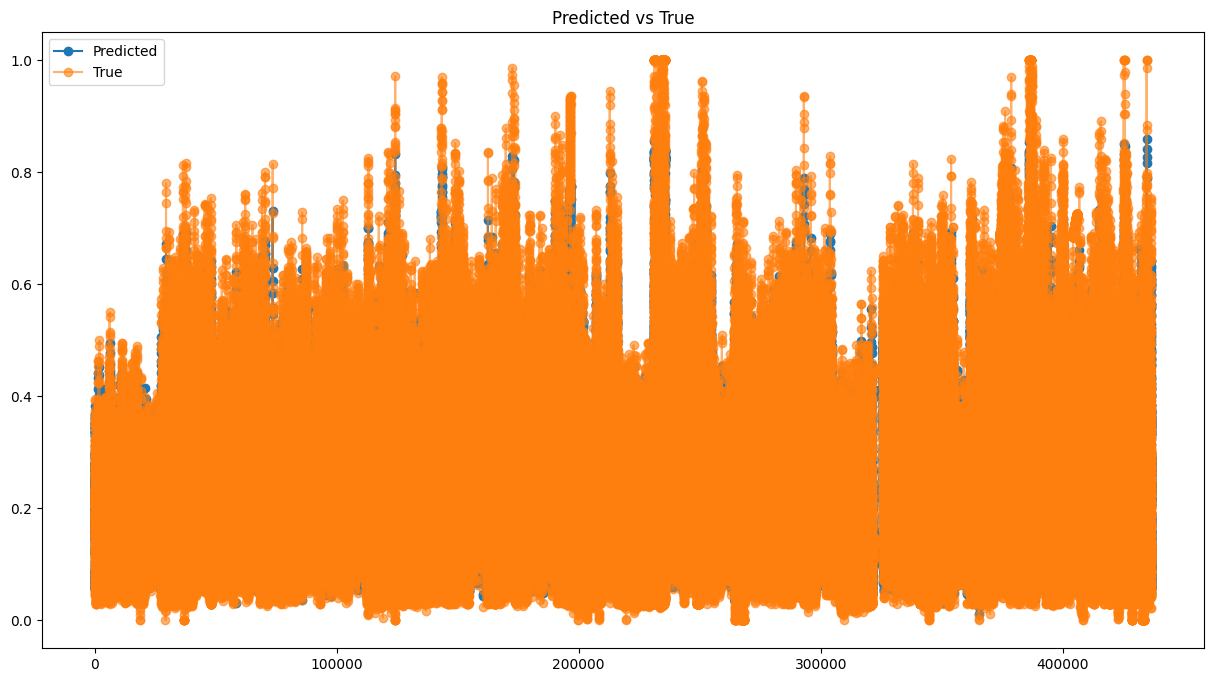

In [12]:
yhat = model.predict(array_Xtest)
model_utils.plotPredicted(yhat,array_Ytest)

In [13]:
model_utils.forecast_accuracy(yhat,array_Ytest)

{'mae': 0.022236799413072137,
 'mse': 0.0317427357489313,
 'rmse': 0.001007601272826481}

In [14]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
yhat_df = pd.DataFrame(yhat_scaled, columns=['Glucose level'])
yhat_df

Glucose level
0          149.382263
1          147.409485
2          148.314728
3          144.888153
4          156.550156
...               ...
436598     122.749146
436599     162.385147
436600     184.588333
436601     204.131989
436602     216.607559

[436603 rows x 1 columns]

In [15]:
array_Ytest_scaled=scalerGlucosa.inverse_transform(array_Ytest)
array_Ytest_df = pd.DataFrame(array_Ytest_scaled, columns=['Glucose level'])
array_Ytest_df

Glucose level
0               141.0
1               140.0
2               139.0
3               145.0
4               159.0
...               ...
436598          137.0
436599          177.0
436600          198.0
436601          216.0
436602          233.0

[436603 rows x 1 columns]

In [16]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=array_Ytest_df['Glucose level']
dfPlot['y_pred']=yhat_df['Glucose level']
dfPlot.index=pd.date_range("2023-01-01", periods=len(array_Ytest), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   141.0  149.382263
2023-01-01 00:15:00   140.0  147.409485
2023-01-01 00:30:00   139.0  148.314728
2023-01-01 00:45:00   145.0  144.888153
2023-01-01 01:00:00   159.0  156.550156
...                     ...         ...
2035-06-14 21:30:00   137.0  122.749146
2035-06-14 21:45:00   177.0  162.385147
2035-06-14 22:00:00   198.0  184.588333
2035-06-14 22:15:00   216.0  204.131989
2035-06-14 22:30:00   233.0  216.607559

[436603 rows x 2 columns]

AP, BE, EP: (0.9860582406860252, 0.012168977695933596, 0.001772781618041145)


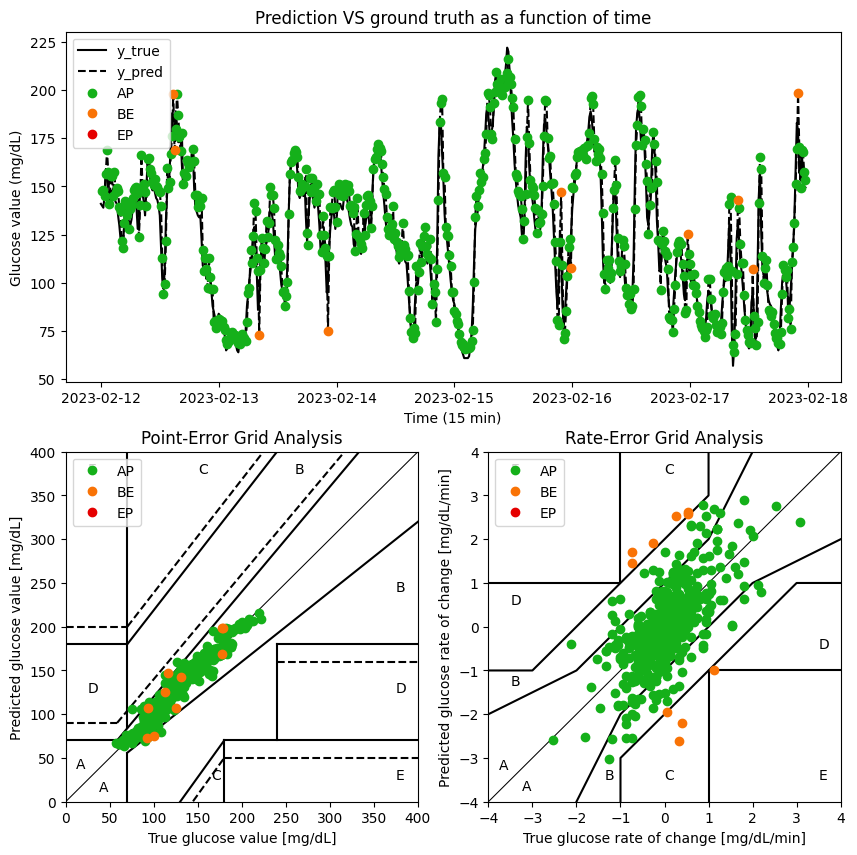

In [17]:
cg_ega = CG_EGA(dfPlot, 15)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

In [18]:
cg_ega.per_sample()

datetime  y_true      y_pred   dy_true   dy_pred CG_EGA  \
0      2023-02-12 00:00:00   141.0  149.382263       NaN       NaN    NaN   
1      2023-02-12 00:15:00   140.0  147.409485 -0.066667 -0.131519     AP   
2      2023-02-12 00:30:00   139.0  148.314728 -0.066667  0.060350     AP   
3      2023-02-12 00:45:00   145.0  144.888153  0.400000 -0.228438     AP   
4      2023-02-12 01:00:00   159.0  156.550156  0.933333  0.777467     AP   
...                    ...     ...         ...       ...       ...    ...   
436598 2035-07-26 21:30:00   137.0  122.749146  2.333333  2.715820     AP   
436599 2035-07-26 21:45:00   177.0  162.385147  2.666667  2.642400     AP   
436600 2035-07-26 22:00:00   198.0  184.588333  1.400000  1.480212     AP   
436601 2035-07-26 22:15:00   216.0  204.131989  1.200000  1.302910     AP   
436602 2035-07-26 22:30:00   233.0  216.607559  1.133333  0.831705     AP   

       P_EGA R_EGA  
0        NaN   NaN  
1          A     A  
2          A     A  
3          A     A  
4          A     A  
...      ...   ...  
436598     A     A  
436599     A     A  
436600     A     A  
436601     A     A  
436602     A     A  

[436603 rows x 8 columns]

# Predicción a 30 min del conjunto de pruebas generales

In [19]:
lenHorizonte=2
XTest=[]
YTest=[]
for i in range(lenHorizonte):
    XTest.append(array_Xtest[i]) 
    YTest.append(array_Ytest[i]) 
XTest=np.reshape(XTest, (lenHorizonte, array_Xtest.shape[1],array_Xtest.shape[2]))

df_YTest = pd.DataFrame(YTest, columns=['Glucose level True'])

YTest_scaled=scalerGlucosa.inverse_transform(YTest)
df_YTest_scaled = pd.DataFrame(YTest_scaled, columns=['Glucose level True']) 

In [20]:
yhat = model.predict(XTest)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 45ms/step


Glucose level Predict  Glucose level True
0               0.237788            0.219565
1               0.233499            0.217391

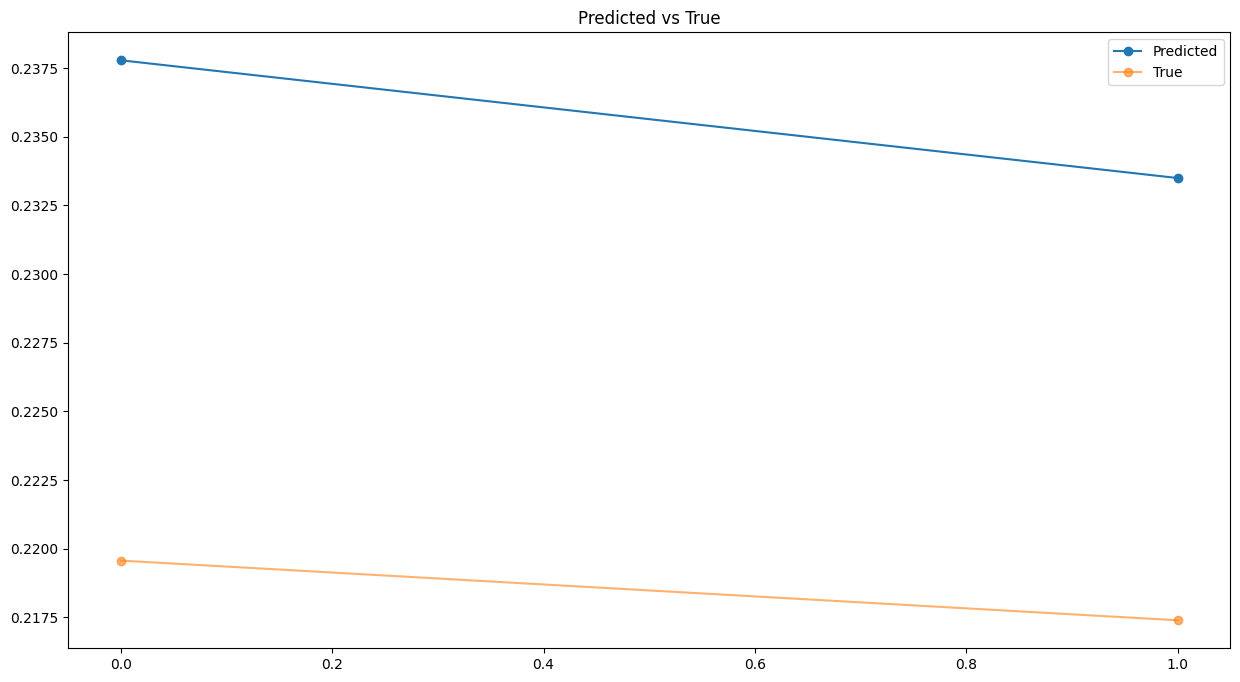

{'mae': 0.017164939706740157,
 'mse': 0.01719747633294479,
 'rmse': 0.0002957531922221962}

In [21]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [22]:
yhat_scaled=scalerGlucosa.inverse_transform(yhat)
df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             149.382263               141.0
1             147.409485               140.0

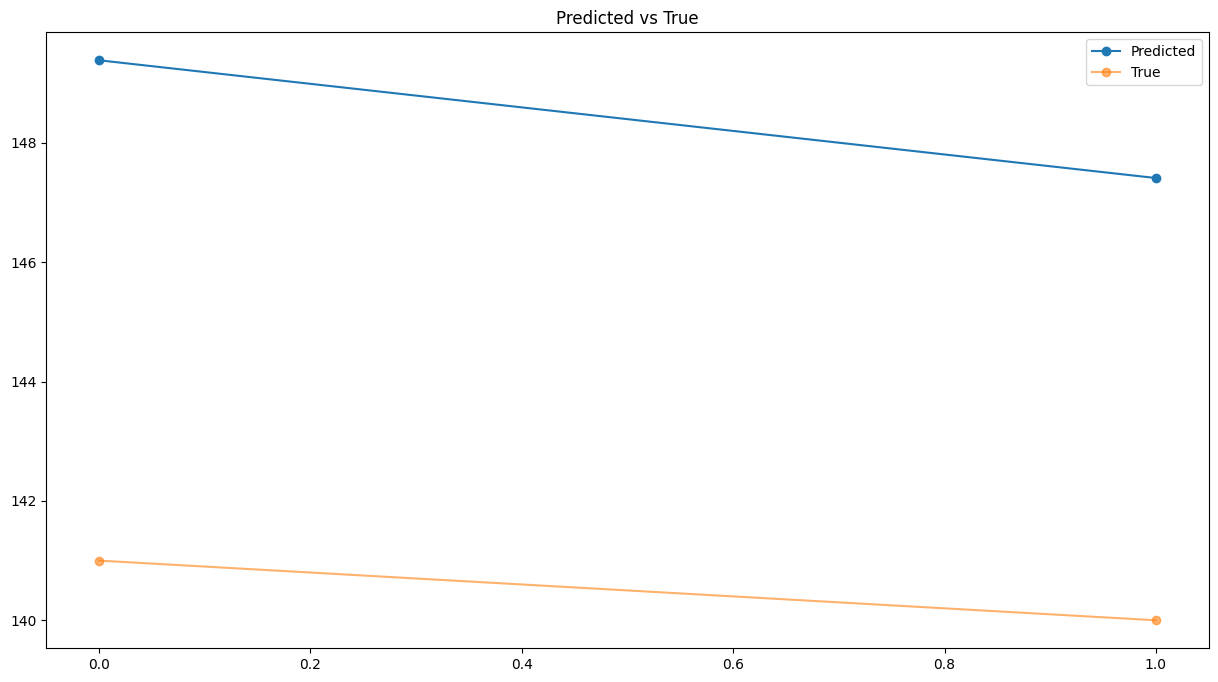

{'mae': 7.8958740234375, 'mse': 7.9108407270727295, 'rmse': 62.5814010091126}

In [23]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción sobre predicción a 30 min del conjunto de pruebas generales

In [24]:
yhat=model_utils.predictionOverPrediction(XTest,model)
df_yhat = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_yhat.head()

df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest['Glucose level True']
df_glucose.head()

1/1 [==============================] - 0s 65ms/step


Glucose level Predict  Glucose level True
0               0.237788            0.219565
1               0.258936            0.217391

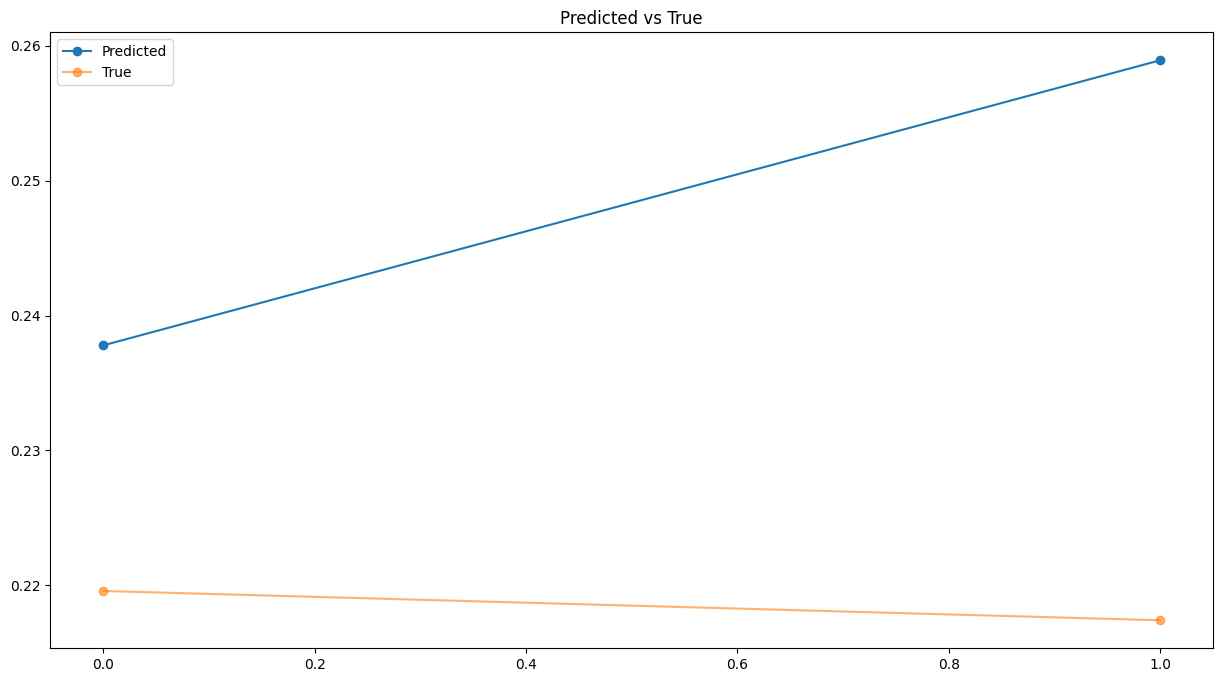

{'mae': 0.029883647029814497,
 'mse': 0.032078327330738836,
 'rmse': 0.001029019084338026}

In [25]:
model_utils.plotPredicted(yhat,YTest)
model_utils.forecast_accuracy(yhat,YTest)

In [26]:
yhat_scaled=scalerGlucosa.inverse_transform(df_yhat) 

df_glucose = pd.DataFrame(yhat_scaled, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_YTest_scaled['Glucose level True']
df_glucose.head()

Glucose level Predict  Glucose level True
0             149.382263               141.0
1             159.110703               140.0

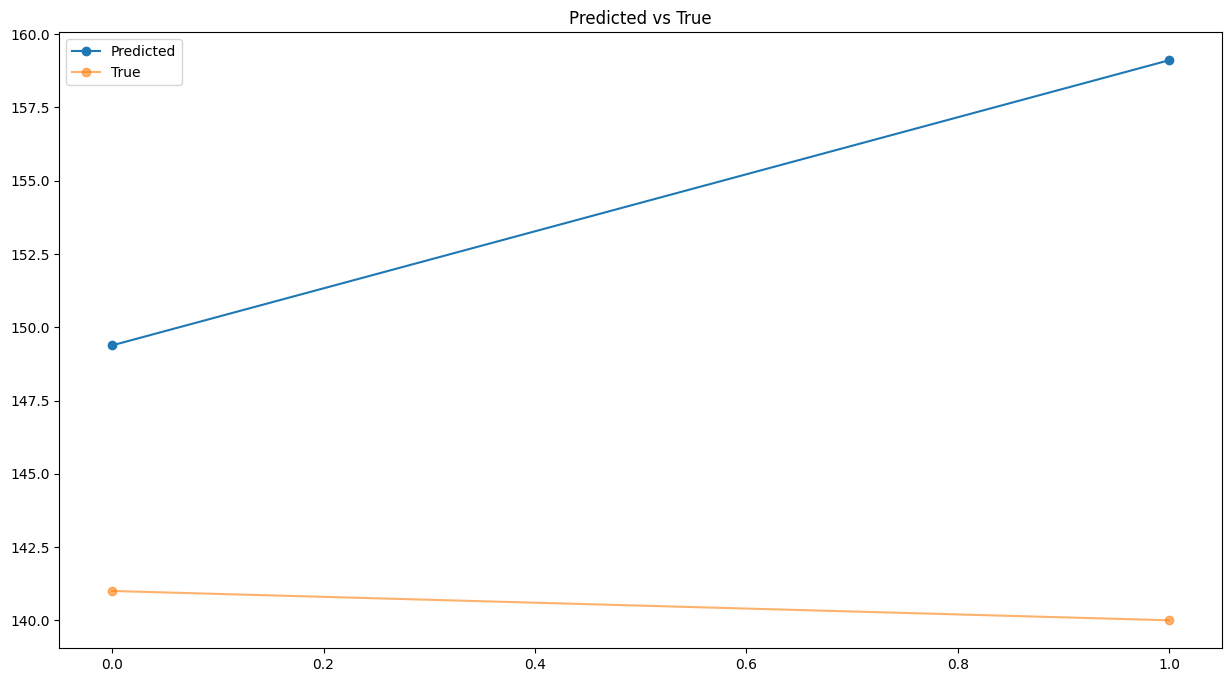

{'mae': 13.746482849121094,
 'mse': 14.756037521679412,
 'rmse': 217.74064334121067}

In [27]:
model_utils.plotPredicted(yhat_scaled,YTest_scaled)
model_utils.forecast_accuracy(yhat_scaled,YTest_scaled)

# Predicción del conjunto pruebas del paciente 1

In [28]:
with open('dataset/generado/paciente1/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [29]:
with open('dataset/generado/paciente1/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [30]:
len(X)

191

In [31]:
len(Y)

191

In [32]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [33]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

6/6 [==============================] - 0s 11ms/step


Glucose level Predict  Glucose level True
0               0.234104            0.182609
1               0.164767            0.154348
2               0.145894            0.152174
3               0.164178            0.150000
4               0.154321            0.123913

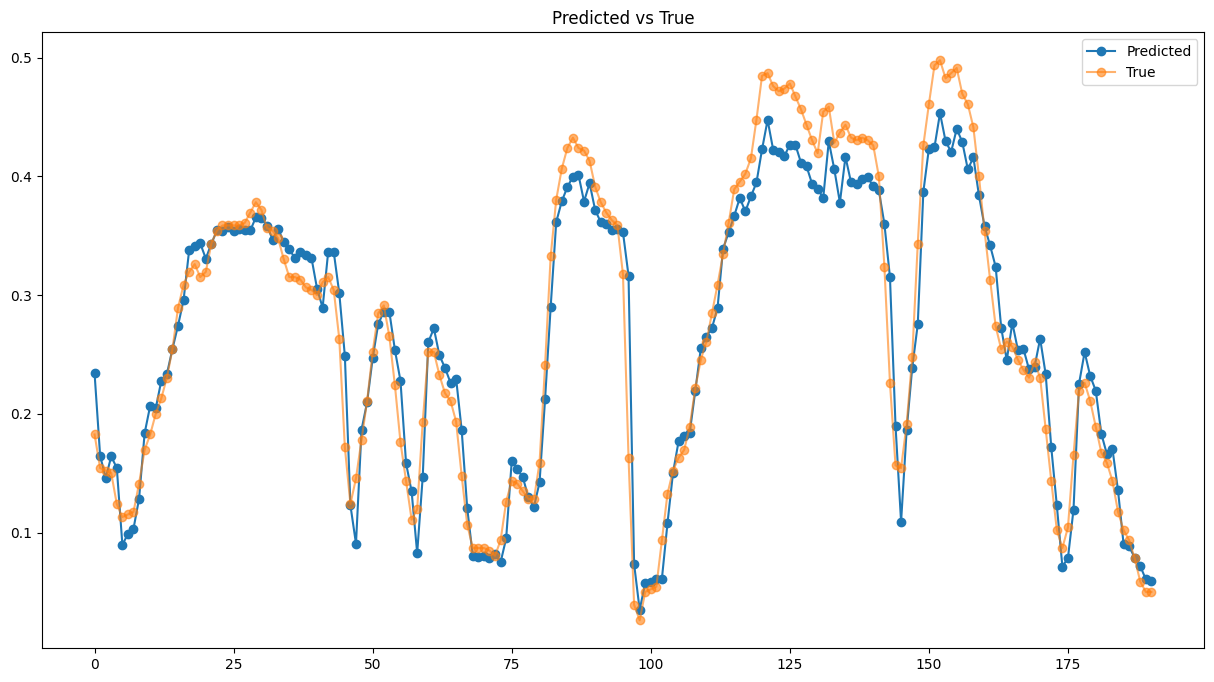

{'mae': 0.023638384744962528,
 'mse': 0.030930693370808723,
 'rmse': 0.0009567077923989907}

In [34]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

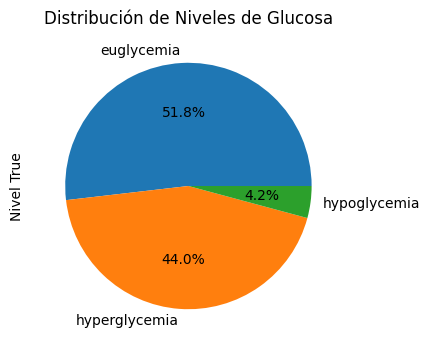

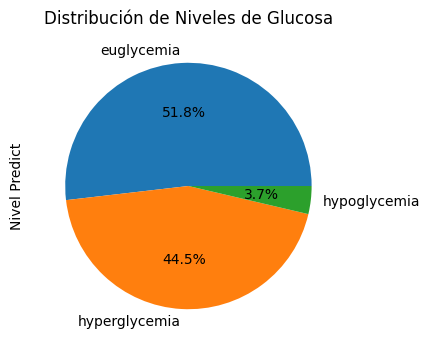

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0               124.0  euglycemia             147.687958    euglycemia
1               111.0  euglycemia             115.792892    euglycemia
2               110.0  euglycemia             107.111305    euglycemia
3               109.0  euglycemia             115.521851    euglycemia
4                97.0  euglycemia             110.987869    euglycemia

In [35]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


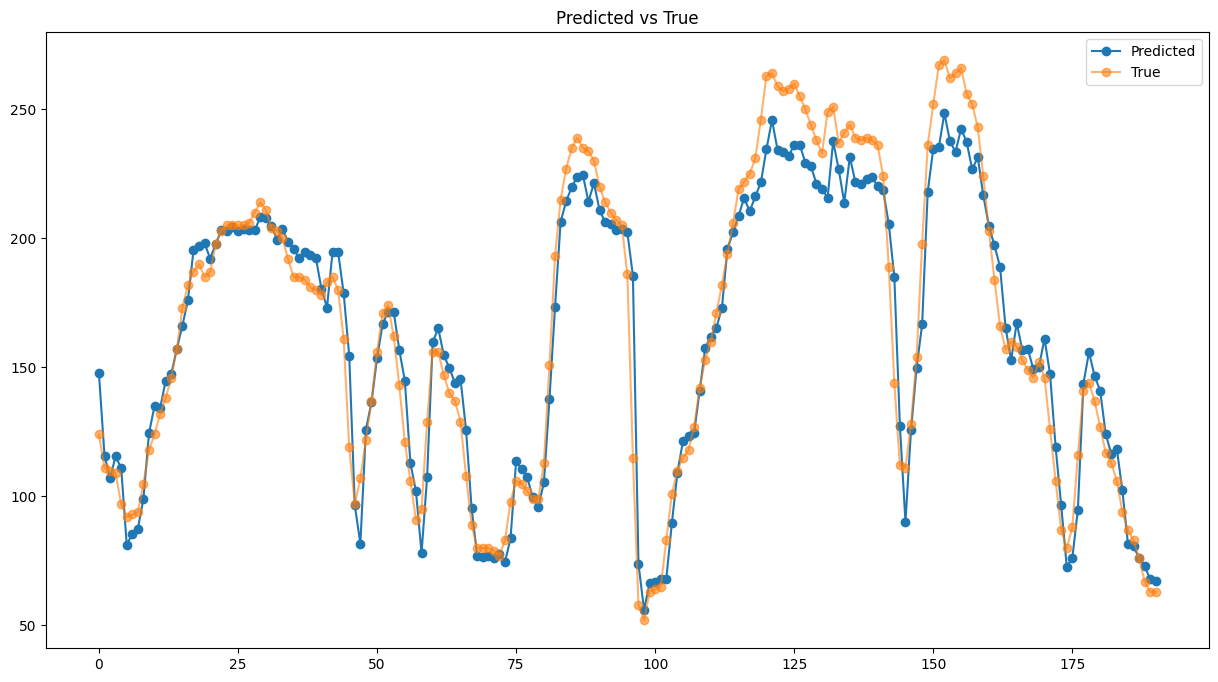

{'mae': 10.873656907006708,
 'mse': 14.22811960957909,
 'rmse': 202.43938762448906}

In [36]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [37]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   124.0  147.687958
2023-01-01 00:15:00   111.0  115.792892
2023-01-01 00:30:00   110.0  107.111305
2023-01-01 00:45:00   109.0  115.521851
2023-01-01 01:00:00    97.0  110.987869
...                     ...         ...
2023-01-02 22:30:00    83.0   80.667358
2023-01-02 22:45:00    76.0   76.174179
2023-01-02 23:00:00    67.0   72.987999
2023-01-02 23:15:00    63.0   67.875832
2023-01-02 23:30:00    63.0   67.230652

[191 rows x 2 columns]

AP, BE, EP: (0.9947368421052631, 0.005263157894736842, 0.0)


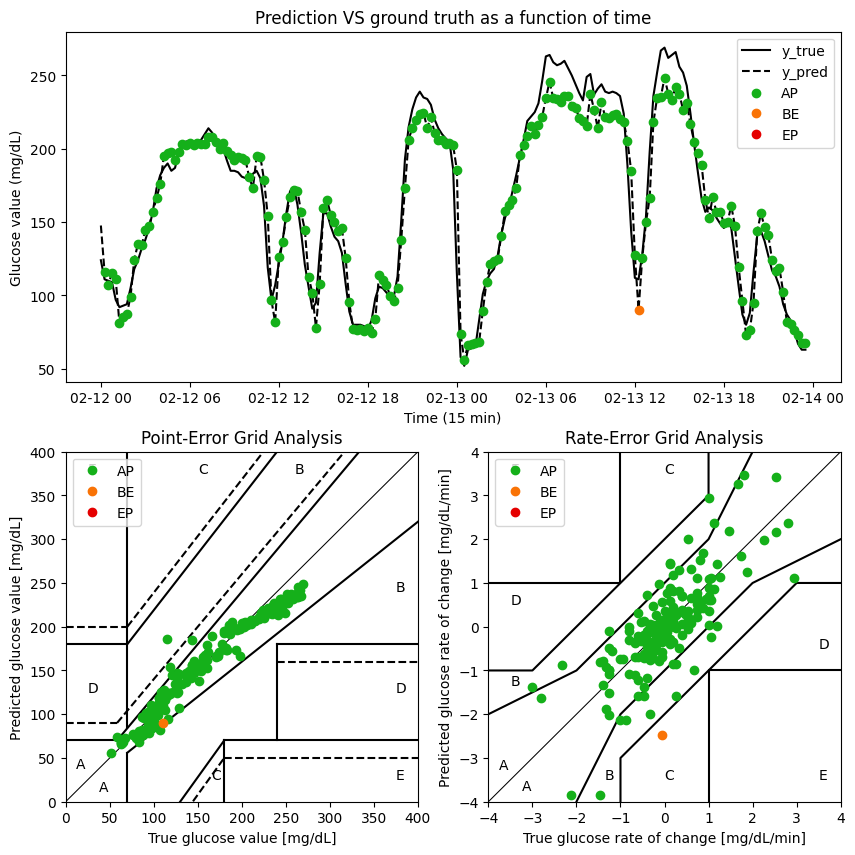

In [38]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 2

In [39]:
with open('dataset/generado/paciente2/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [40]:
with open('dataset/generado/paciente2/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [41]:
len(X)

1742

In [42]:
len(Y)

1742

In [43]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [44]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

55/55 [==============================] - 0s 7ms/step


Glucose level Predict  Glucose level True
0               0.361765            0.373913
1               0.368448            0.400000
2               0.392397            0.404348
3               0.372083            0.406522
4               0.385518            0.397826

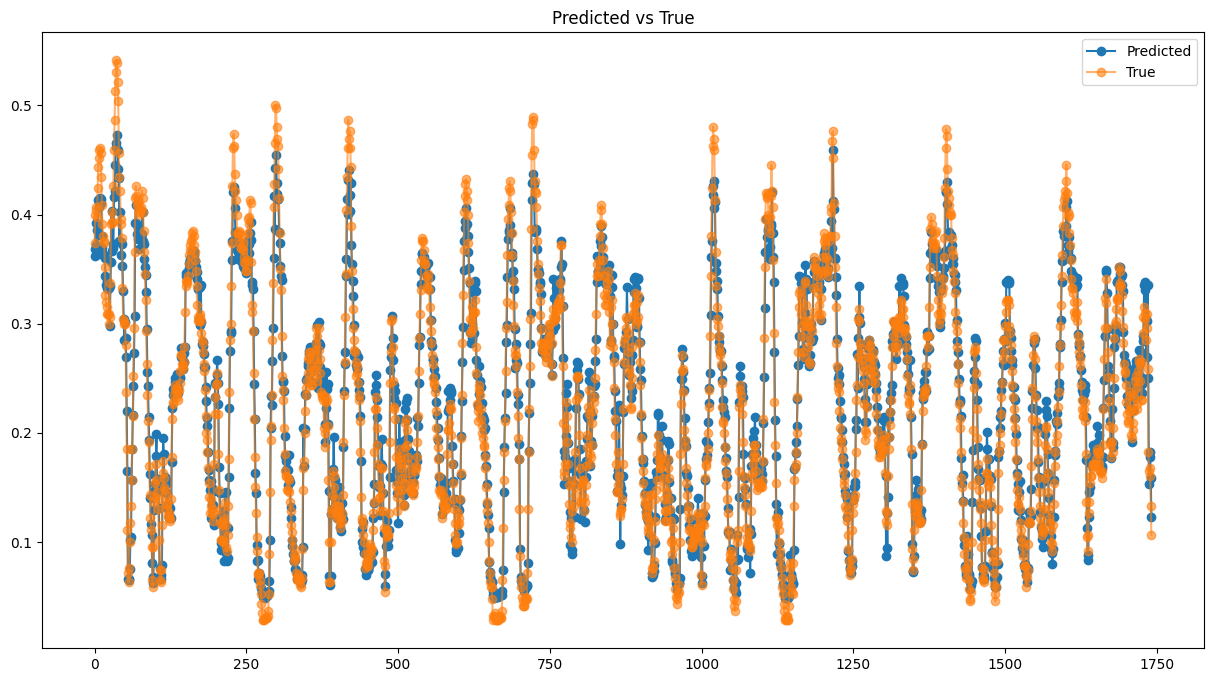

{'mae': 0.015720525423610333,
 'mse': 0.020070981496266297,
 'rmse': 0.00040284429822346407}

In [45]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

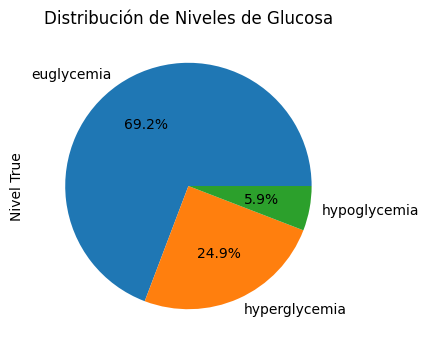

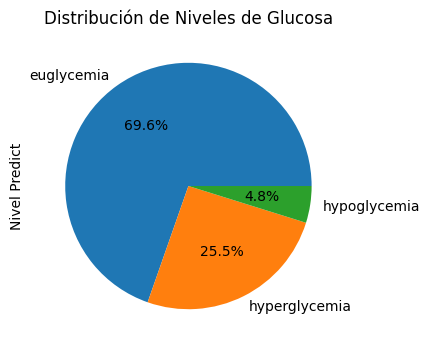

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               212.0  hyperglycemia             206.411804  hyperglycemia
1               224.0  hyperglycemia             209.486115  hyperglycemia
2               226.0  hyperglycemia             220.502808  hyperglycemia
3               227.0  hyperglycemia             211.158173  hyperglycemia
4               223.0  hyperglycemia             217.338379  hyperglycemia

In [46]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


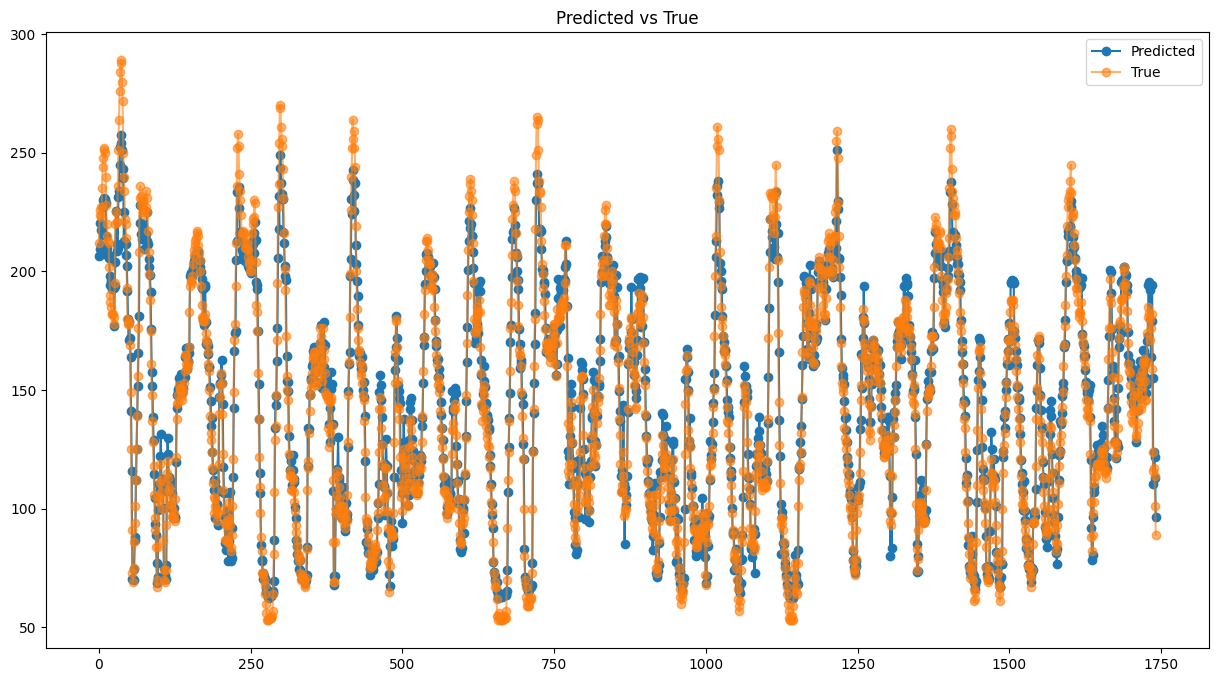

{'mae': 7.231441976939222, 'mse': 9.232651906698047, 'rmse': 85.24186123025508}

In [47]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [48]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   212.0  206.411804
2023-01-01 00:15:00   224.0  209.486115
2023-01-01 00:30:00   226.0  220.502808
2023-01-01 00:45:00   227.0  211.158173
2023-01-01 01:00:00   223.0  217.338379
...                     ...         ...
2023-01-19 02:15:00   116.0  110.626938
2023-01-19 02:30:00   117.0  124.051140
2023-01-19 02:45:00   114.0  121.649162
2023-01-19 03:00:00   101.0  113.038193
2023-01-19 03:15:00    89.0   96.723694

[1742 rows x 2 columns]

AP, BE, EP: (0.9954049396898335, 0.004595060310166571, 0.0)


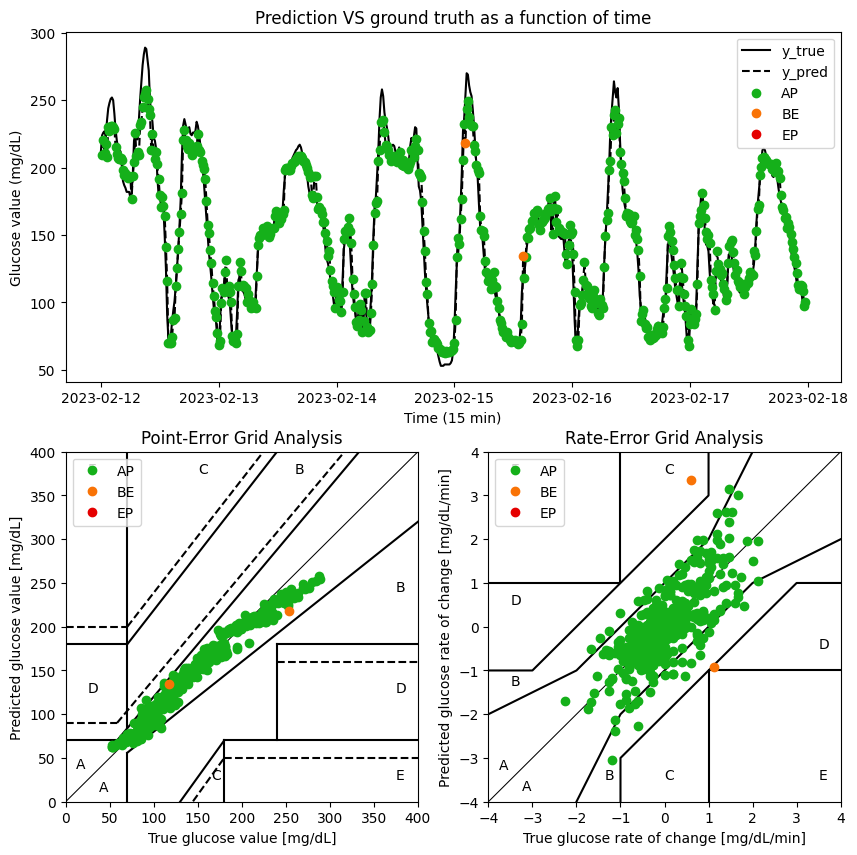

In [49]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 3

In [50]:
with open('dataset/generado/paciente3/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [51]:
with open('dataset/generado/paciente3/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [52]:
len(X)

3586

In [53]:
len(Y)

3586

In [54]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [55]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

113/113 [==============================] - 1s 10ms/step


Glucose level Predict  Glucose level True
0               0.283038            0.261858
1               0.247998            0.229051
2               0.226869            0.196245
3               0.181498            0.163439
4               0.158587            0.130632

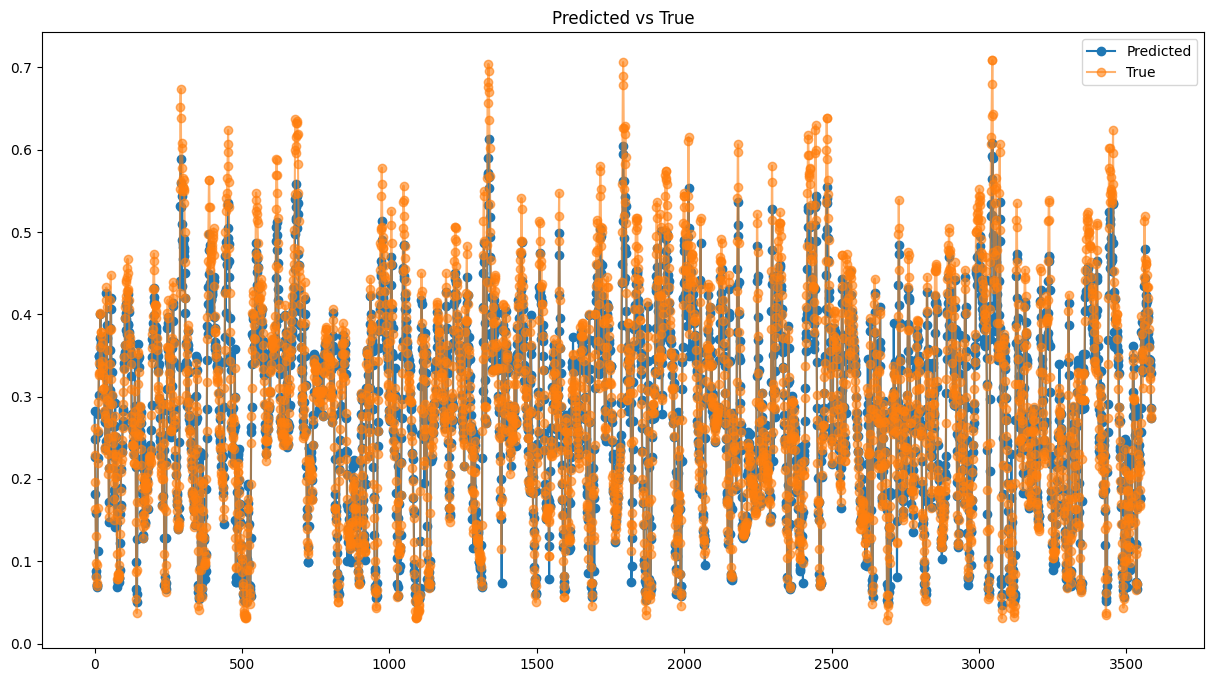

{'mae': 0.025673320876553222,
 'mse': 0.034105206051201195,
 'rmse': 0.0011631650797948908}

In [56]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

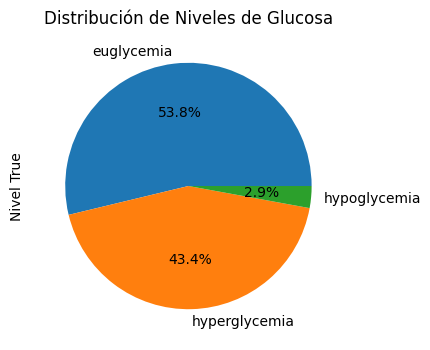

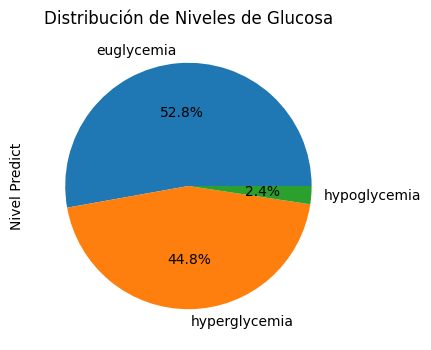

Glucose level True  Nivel True  Glucose level Predict Nivel Predict
0          160.454545  euglycemia             170.197556    euglycemia
1          145.363636  euglycemia             154.078888    euglycemia
2          130.272727  euglycemia             144.359573    euglycemia
3          115.181818  euglycemia             123.489288    euglycemia
4          100.090909  euglycemia             112.949997    euglycemia

In [57]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


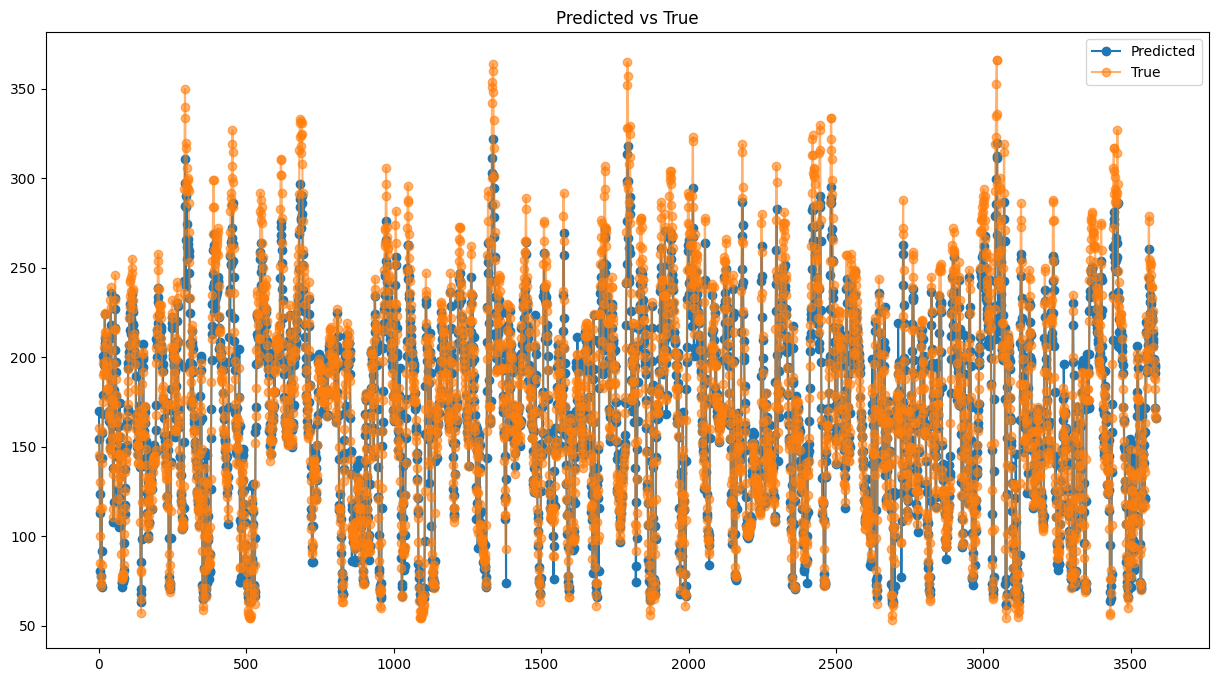

{'mae': 11.809728526604452,
 'mse': 15.688396390025444,
 'rmse': 246.1257812905634}

In [58]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [59]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00  160.454545  170.197556
2023-01-01 00:15:00  145.363636  154.078888
2023-01-01 00:30:00  130.272727  144.359573
2023-01-01 00:45:00  115.181818  123.489288
2023-01-01 01:00:00  100.090909  112.949997
...                         ...         ...
2023-02-07 07:15:00  188.000000  195.761719
2023-02-07 07:30:00  182.000000  194.641907
2023-02-07 07:45:00  171.000000  191.020432
2023-02-07 08:00:00  167.000000  171.662552
2023-02-07 08:15:00  166.000000  165.949249

[3586 rows x 2 columns]

AP, BE, EP: (0.9821478382147838, 0.014783821478382147, 0.0030683403068340305)


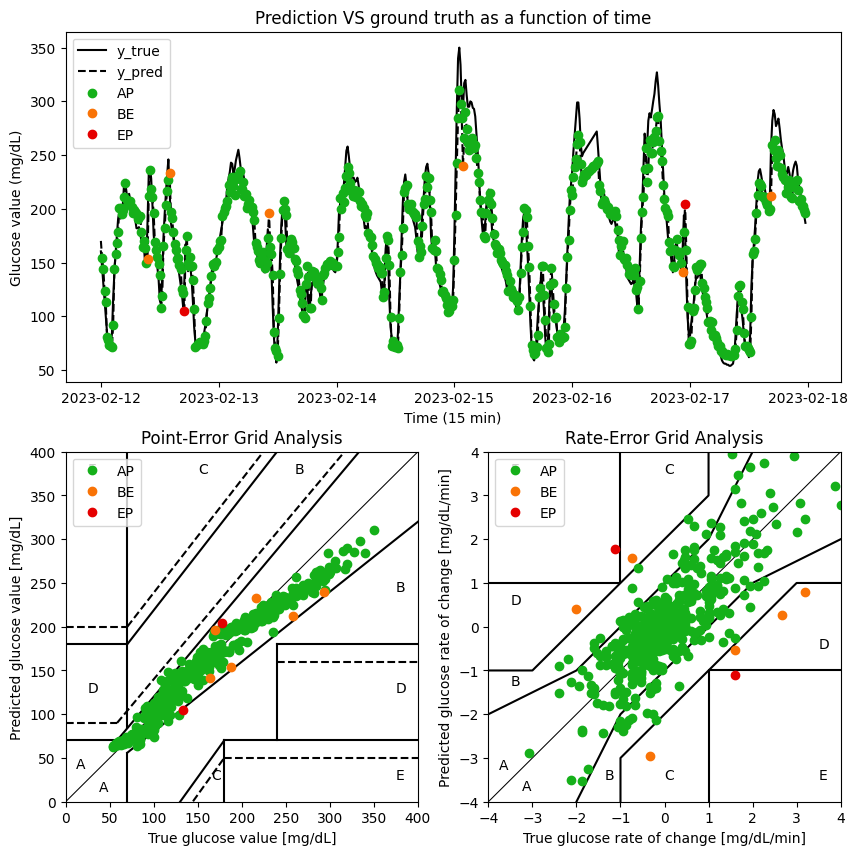

In [60]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)

# Predicción del conjunto pruebas del paciente 4

In [61]:
with open('dataset/generado/paciente4/array_Xtest.npy', 'rb') as f:
    X = np.load(f) 

In [62]:
with open('dataset/generado/paciente4/array_Ytest.npy', 'rb') as f:
    Y = np.load(f) 

In [63]:
len(X)

6201

In [64]:
len(Y)

6201

In [65]:
df_Y = pd.DataFrame(Y, columns=['Glucose level True'])

In [66]:
yhat = model.predict(X)
df_glucose = pd.DataFrame(yhat, columns=['Glucose level Predict'])
df_glucose['Glucose level True']=df_Y['Glucose level True']
df_glucose.head()

194/194 [==============================] - 2s 10ms/step


Glucose level Predict  Glucose level True
0               0.472588            0.534783
1               0.456209            0.500000
2               0.416948            0.484783
3               0.430268            0.463043
4               0.396784            0.428261

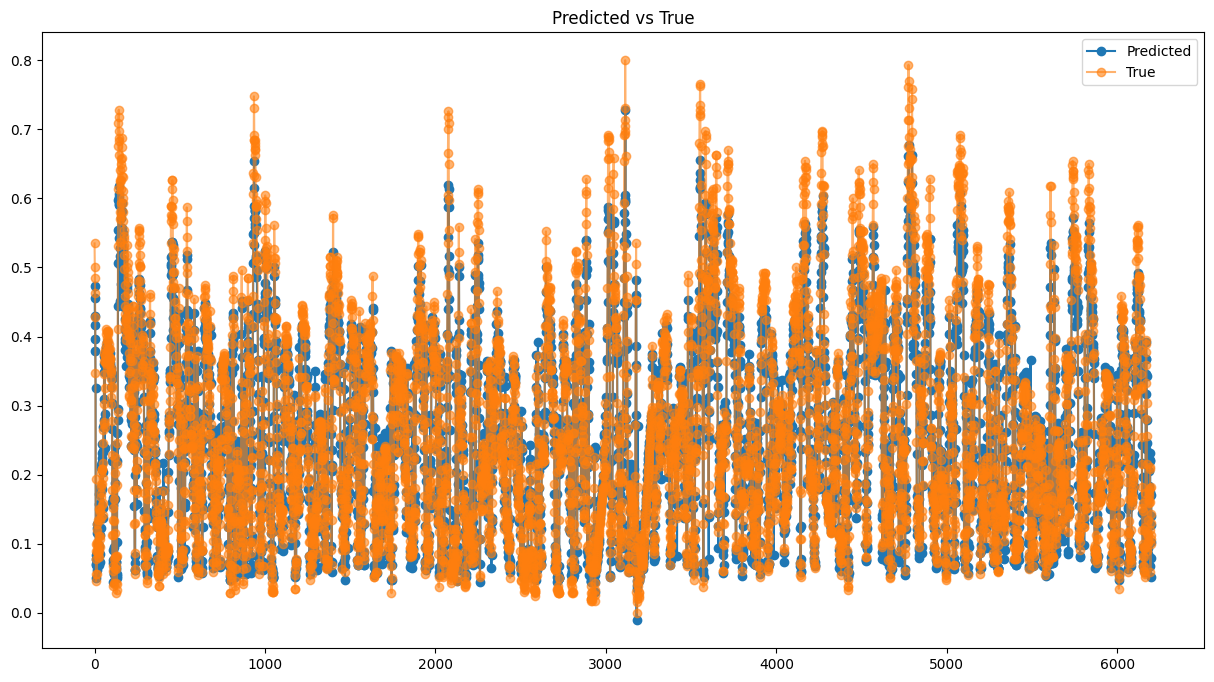

{'mae': 0.028283853786639612,
 'mse': 0.0386423490007667,
 'rmse': 0.001493231136297055}

In [67]:
model_utils.plotPredicted(yhat,Y)
model_utils.forecast_accuracy(yhat,Y)

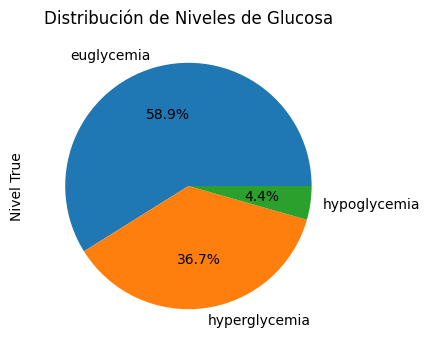

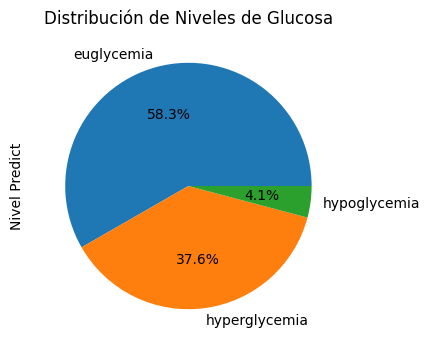

Glucose level True     Nivel True  Glucose level Predict  Nivel Predict
0               286.0  hyperglycemia             257.390381  hyperglycemia
1               270.0  hyperglycemia             249.856216  hyperglycemia
2               263.0  hyperglycemia             231.796219  hyperglycemia
3               253.0  hyperglycemia             237.923096  hyperglycemia
4               237.0  hyperglycemia             222.520569  hyperglycemia

In [68]:
Y_scaled=scalerGlucosa.inverse_transform(Y)
yhat_scaled=scalerGlucosa.inverse_transform(yhat)

df_glucose = pd.DataFrame(Y_scaled, columns=['Glucose level True']) 
df_glucose['Nivel True'] = df_glucose['Glucose level True'].apply(utils.label_LevelBG) 
df_glucose['Nivel True'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose['Glucose level Predict']=yhat_scaled
df_glucose['Nivel Predict'] = df_glucose['Glucose level Predict'].apply(utils.label_LevelBG) 

df_glucose['Nivel Predict'].value_counts().plot.pie(title='Distribución de Niveles de Glucosa',y='level_label',legend=False,autopct='%1.1f%%',figsize=(10, 4))
plt.show()

df_glucose.head()


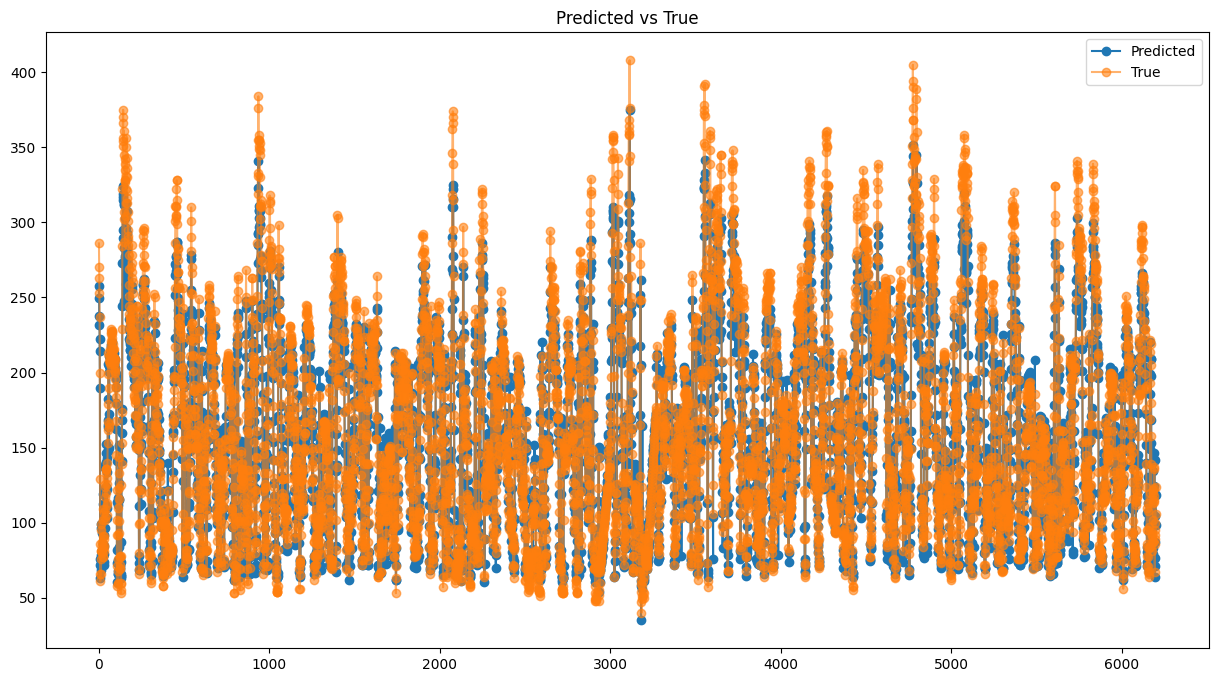

{'mae': 13.010574076263898,
 'mse': 17.775482874726315,
 'rmse': 315.96779142968853}

In [69]:
model_utils.plotPredicted(yhat_scaled,Y_scaled)
model_utils.forecast_accuracy(yhat_scaled,Y_scaled)

In [70]:
dfPlot=pd.DataFrame()
dfPlot['y_true']=df_glucose['Glucose level True']
dfPlot['y_pred']=df_glucose['Glucose level Predict']
dfPlot.index=pd.date_range("2023-01-01", periods=len(df_glucose['Glucose level True']), freq="15min")
dfPlot

y_true      y_pred
2023-01-01 00:00:00   286.0  257.390381
2023-01-01 00:15:00   270.0  249.856216
2023-01-01 00:30:00   263.0  231.796219
2023-01-01 00:45:00   253.0  237.923096
2023-01-01 01:00:00   237.0  222.520569
...                     ...         ...
2023-03-06 13:00:00   100.0  104.373573
2023-03-06 13:15:00    89.0   87.343018
2023-03-06 13:30:00    92.0   76.219658
2023-03-06 13:45:00   106.0   98.569412
2023-03-06 14:00:00   124.0  118.249573

[6201 rows x 2 columns]

AP, BE, EP: (0.9669354838709677, 0.02903225806451613, 0.004032258064516129)


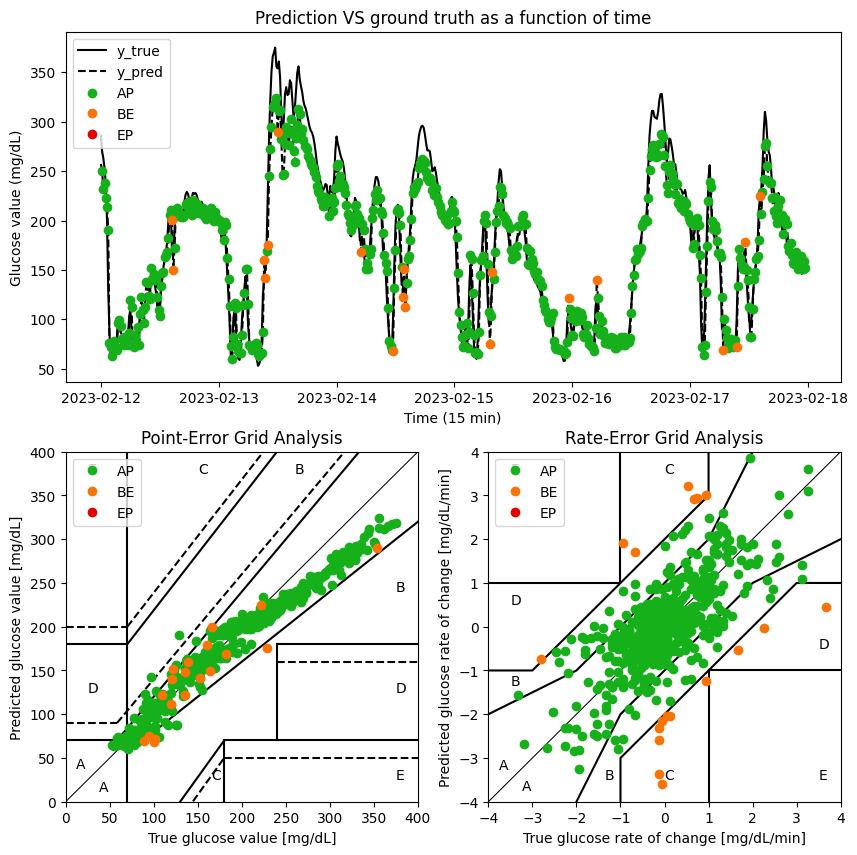

In [71]:
freq = 15
cg_ega = CG_EGA(dfPlot, freq)
print("AP, BE, EP:", cg_ega.reduced())
cg_ega.plot(day=5)